In [1]:
import yaml
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# plt.style.use(['science','ieee'])

In [2]:
with open("result.yaml", "r") as stream:
    try:
        data = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

In [3]:
data

{'env': ['Ubuntu 20.04', 'CPU optimized, dedicated threads, 2 CPU, 4 GB'],
 'giga_flop': {'python': {'ans': 6.010226,
   'time': '24632.9, 25045.8, 24768.1, 24560.6, 24693.6'},
  'cpp': {'ans': 6.01023, 'time': '1233, 1274, 1233, 1233, 1280'},
  'nativeJS': {'ans': 6.010225599163468,
   'time': '1309, 1256, 1263, 1242, 1256'},
  'pyodide': {'ans': 6.010225599163468,
   'time': '104895, 104352, 100708, 106614, 96934'},
  'wasm': {'ans': 6.010225599163468, 'time': '1333, 1380, 1381, 1346, 1333'}},
 'matmul': {'python': {'size_128': {'time': '802.7, 833.4, 793.2, 818.8, 784.8'},
   'size_256': {'time': '6343.5, 6355.6, 6668.2, 6349.4, 6295.2'},
   'size_512': {'time': '52979.5, 51691.5, 52212.1, 51967.9, 51909.5'},
   'size_1024': {'time': '425242.9, 422868.0, 422328.8, 427920.3, 436960.9'}},
  'pyodide': {'size_128': {'time': '2248, 2226, 2139, 2147, 2143'},
   'size_256': {'time': '17239, 17734, 18047, 17535, 16826'},
   'size_512': {'time': '139856, 142991, 144052, 144169, 146309'},
  

In [4]:
norm_data = {}
for exe, item in data["giga_flop"].items():
    times = item["time"]
    avg_time = np.mean([float(t) for t in times.split(",")])
    norm_data[exe] = round(avg_time)
print(norm_data)
df = pd.DataFrame.from_dict(norm_data, orient='index', columns=['time'])
print(df)

{'python': 24740, 'cpp': 1251, 'nativeJS': 1265, 'pyodide': 102701, 'wasm': 1355}
            time
python     24740
cpp         1251
nativeJS    1265
pyodide   102701
wasm        1355


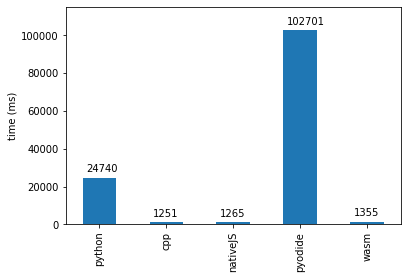

In [5]:
ax = df.plot(y="time", kind="bar", use_index=True, ylabel="time (ms)")
ax.legend().set_visible(False)
ax.set_ylim(0,115000)
# ax.grid(visible=True)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.05, p.get_height() + 3000))

In [26]:
norm_data = defaultdict(dict)
for exe, item in data["matmul"].items():
    for size in item:
        times = item[size]["time"]
        avg_time = np.mean([float(t) for t in times.split(",")])
        norm_data[exe][size] = round(avg_time)
print(norm_data)
df = pd.DataFrame.from_dict(norm_data, orient='index', columns=['size_128', 'size_256', 'size_512', 'size_1024', 'size_2048'])
print(df)
df = df.transpose()
print(df)

defaultdict(<class 'dict'>, {'python': {'size_128': 807, 'size_256': 6402, 'size_512': 52152, 'size_1024': 427064}, 'pyodide': {'size_128': 2181, 'size_256': 17476, 'size_512': 143475, 'size_1024': 1286022}, 'cpp': {'size_128': 2, 'size_256': 15, 'size_512': 198, 'size_1024': 3140, 'size_2048': 63878}, 'nativeJS': {'size_128': 12, 'size_256': 51, 'size_512': 396, 'size_1024': 4802, 'size_2048': 69649}, 'wasm': {'size_128': 5, 'size_256': 39, 'size_512': 389, 'size_1024': 5813, 'size_2048': 83590}})
          size_128  size_256  size_512  size_1024  size_2048
python         807      6402     52152     427064        NaN
pyodide       2181     17476    143475    1286022        NaN
cpp              2        15       198       3140    63878.0
nativeJS        12        51       396       4802    69649.0
wasm             5        39       389       5813    83590.0
             python    pyodide      cpp  nativeJS     wasm
size_128      807.0     2181.0      2.0      12.0      5.0
size_256    

(0.0, 90000.0)

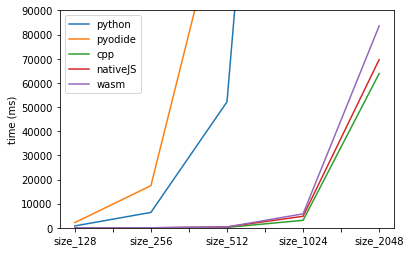

In [25]:
ax = df.plot(use_index=True, ylabel="time (ms)")
ax.set_ylim(0, 90000)